In [2]:
from treasury_ml_utils.snowflake_utils import SnowflakeConnector

snowflake_client = SnowflakeConnector("joshua.choy@transferwise.com")

 pip install snowflake-connector-python[secure-local-storage]


Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://transferwise.okta-emea.com/app/snowflake/exk4istpb5gZUyV8u0i7/sso/saml?SAMLRequest=nZJRb9owEMe%2FSuQ9J3ZSENQCKlrGmqntKAQq8WaSAzwSO%2FM5Ddmnnwll6h7ah0l5iJzfXX7n%2Fw1ujkXuvYJBqdWQhAEjHqhUZ1LthmSZTP0%2B8dAKlYlcKxiSBpDcjAYoirzk48ru1Rx%2BVYDWc40U8vbDkFRGcS1QIleiAOQ25Yvx4wOPAsZLo61OdU7elXxeIRDBWGd4KclQOr29tSWntK7roL4KtNnRiDFG2TV11An5cuGPbqYP%2BJCyzol3hMNnb263Up2v4DOtzRlCfp8kM3%2F2Y5EQb3xRvdMKqwLMAsyrTGE5fzgLoDOYJ1GvE%2FUDqPwUlDUi98MAla63uThAqouysq5x4N7oFjKa6510s8eTISkPMnusDvffXuLj6jaSP6fVfSNenlWsk68Yb5vv69VeL373n56bTbNMibe6hBudwo0RK4jVKVLrjljU9cPQPQmLeHTF2XXQ7XXXxJu4SKUStq28eDtThVswtUQI9MEKHwoQraYoS%2Fp3AgrHQ0eiLTfd3XrZrPoVkz2KqOkpa3JeH96qmNF%2FXMqAvm%2FwtoxPLp94MtO5TBtvqk0h7MfxhUHYnsjM37Yoh0LIfJxlBhBdjHmu6zsDwrqdt6YCQkfnv%2F679aM%2F&Relay

 pip install snowflake-connector-python[secure-local-storage]


9.36.1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [29]:
df = snowflake_client.fetch(f"""
    SELECT *, ((BID_OUTRIGHT+OFFER_OUTRIGHT)/2) as mid
    FROM RPT_TREASURY.INT_ASSET_PRICING__FX_QUOTE_SNAPSHOT_HOURLY
    WHERE CCY_PAIR IN ('EURUSD', 'GBPUSD', 'USDJPY', 'AUDUSD', 
                            'NZDUSD','USDCAD', 'USDCNH', 'USDSGD',
                            'USDMYR', 'USDIDR', 'USDINR', 
                            'USDPHP', 'USDTWD', 'USDCHF', 'USDTHB',
                            'USDKRW')
    AND TENOR_CODE = 'SP'
    AND INSTRUMENT_TYPE = 'FXSpot'
    AND PROVIDER = 'BLOOMBERG'
    AND TIMESTAMP BETWEEN '2025-06-01 00:00:00' AND '2025-11-10 23:59:59'  
""")
ccy_df = df.pivot(index='timestamp', columns='ccy_pair', values='mid')
ccy_df.head()

ccy_pair,AUDUSD,EURUSD,GBPUSD,NZDUSD,USDCAD,USDCHF,USDCNH,USDIDR,USDINR,USDJPY,USDKRW,USDMYR,USDPHP,USDSGD,USDTHB,USDTWD
timestamp,,,,,,,,,,,,,,,,
2025-06-01 00:00:00,0.64315,1.13475,1.3459,0.59585,1.374,0.82255,7.2051,16290.0,85.58125,144.025,1382.6,4.25675,55.7725,1.291,32.83,29.9145
2025-06-01 01:00:00,0.64315,1.13475,1.3459,0.59585,1.374,0.82255,7.2051,16290.0,85.58125,144.025,1382.6,4.25675,55.7725,1.291,32.83,29.9145
2025-06-01 02:00:00,0.64315,1.13475,1.3459,0.59585,1.374,0.82255,7.2051,16290.0,85.58125,144.025,1382.6,4.25675,55.7725,1.291,32.83,29.9145
2025-06-01 03:00:00,0.64315,1.13475,1.3459,0.59585,1.374,0.82255,7.2051,16290.0,85.58125,144.025,1382.6,4.25675,55.7725,1.291,32.83,29.9145
2025-06-01 04:00:00,0.64315,1.13475,1.3459,0.59585,1.374,0.82255,7.2051,16290.0,85.58125,144.025,1382.6,4.25675,55.7725,1.291,32.83,29.9145


In [30]:
ccy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3912 entries, 2025-06-01 00:00:00 to 2025-11-10 23:00:00
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AUDUSD  3912 non-null   float64
 1   EURUSD  3912 non-null   float64
 2   GBPUSD  3912 non-null   float64
 3   NZDUSD  3912 non-null   float64
 4   USDCAD  3912 non-null   float64
 5   USDCHF  3912 non-null   float64
 6   USDCNH  3912 non-null   float64
 7   USDIDR  3912 non-null   float64
 8   USDINR  3912 non-null   float64
 9   USDJPY  3912 non-null   float64
 10  USDKRW  3912 non-null   float64
 11  USDMYR  3912 non-null   float64
 12  USDPHP  3912 non-null   float64
 13  USDSGD  3912 non-null   float64
 14  USDTHB  3912 non-null   float64
 15  USDTWD  3912 non-null   float64
dtypes: float64(16)
memory usage: 519.6 KB


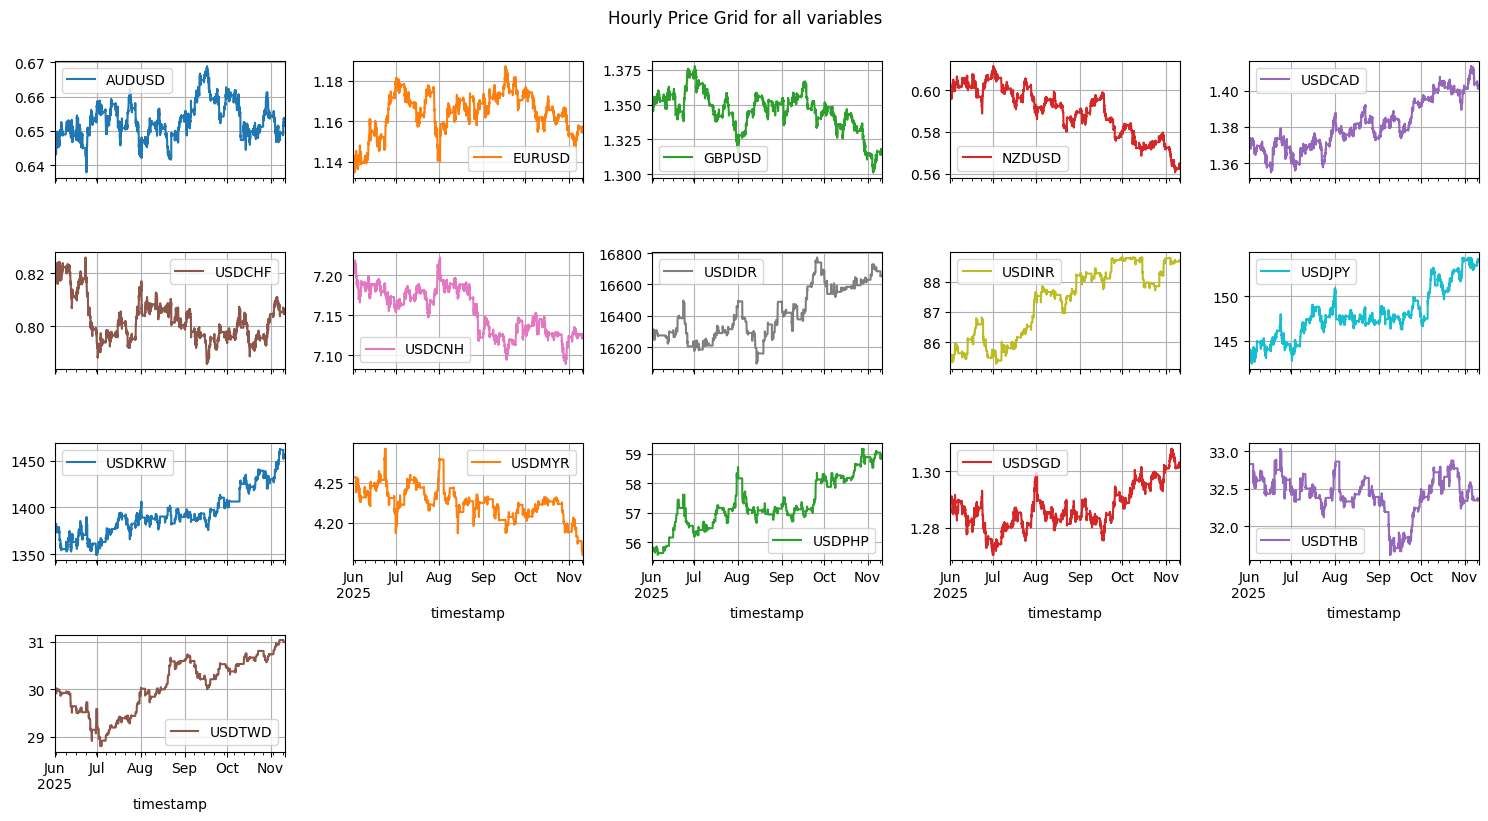

In [35]:
ccy_df.plot(subplots = True, layout = (6,5), figsize = (15,12), title = 'Hourly Price Grid for all variables', grid = True, sharex = True)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

In [36]:
# compute log returns

log_returns = np.log(ccy_df / ccy_df.shift(1))
log_returns = log_returns.dropna()
log_returns.describe()

ccy_pair,AUDUSD,EURUSD,GBPUSD,NZDUSD,USDCAD,USDCHF,USDCNH,USDIDR,USDINR,USDJPY,USDKRW,USDMYR,USDPHP,USDSGD,USDTHB,USDTWD
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,0.000004,0.000005,-0.000005,-0.000014,0.000005,-0.000005,-0.000003,0.000006,0.000009,0.000017,0.000013,-0.000006,0.000014,0.000002,-0.000004,0.000009
std,0.000900,0.000742,0.000734,0.000946,0.000492,0.000808,0.000243,0.000495,0.000379,0.000914,0.000887,0.000448,0.000624,0.000436,0.000723,0.000579
min,-0.007613,-0.005130,-0.009467,-0.009640,-0.006233,-0.013073,-0.003377,-0.006542,-0.007332,-0.012569,-0.011971,-0.008194,-0.010995,-0.007302,-0.012170,-0.011336
25%,-0.000302,-0.000217,-0.000223,-0.000336,-0.000145,-0.000250,-0.000077,0.000000,0.000000,-0.000270,0.000000,0.000000,0.000000,-0.000155,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000308,0.000255,0.000223,0.000335,0.000178,0.000251,0.000077,0.000000,0.000000,0.000337,0.000000,0.000000,0.000000,0.000155,0.000000,0.000000
max,0.010295,0.012288,0.009605,0.009932,0.004451,0.009732,0.001532,0.008307,0.005592,0.013338,0.010187,0.005217,0.007983,0.002817,0.009208,0.012071


# PCA

In [37]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

macro_rets = log_returns[['GBPUSD' ,'EURUSD', 'USDJPY',
                          'AUDUSD', 'NZDUSD', 'USDCAD', 
                          'USDCHF']]


# scaling data 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(macro_rets.dropna())
pca = PCA(n_components=4).fit(scaled_data)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.67791797 0.11626459 0.06028806 0.05552374]
Cumulative explained variance: 0.9099943538655467


               PC1       PC2       PC3       PC4
ccy_pair                                        
GBPUSD    0.392176 -0.069960  0.035225  0.528523
EURUSD    0.410489 -0.216663  0.246113  0.242578
USDJPY   -0.339011  0.484932  0.638800  0.457439
AUDUSD    0.382324  0.481674 -0.235742  0.092297
NZDUSD    0.396976  0.362440 -0.305782  0.128510
USDCAD   -0.358628 -0.348893 -0.467192  0.653785
USDCHF   -0.361100  0.477394 -0.403457  0.009997


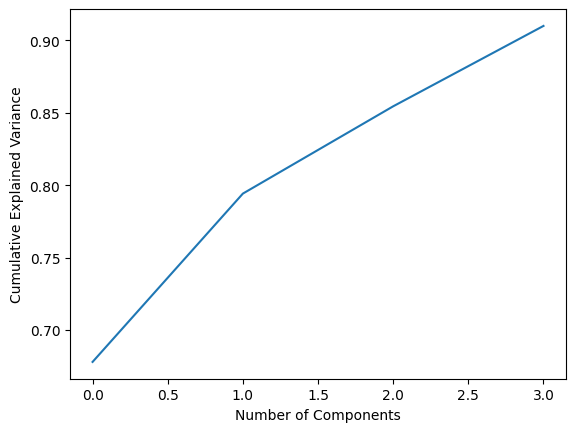

In [38]:
# check loadings contribution

loadings = pd.DataFrame(
    pca.components_.T,
    index=macro_rets.columns,
    columns=[f"PC{i+1}" for i in range(pca.n_components)]
)
print(loadings)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

# Regression

In [39]:
pca_factors = pd.DataFrame(pca.transform(scaled_data), 
                           index=macro_rets.dropna().index, # Use the index from the data fed into PCA
                           columns=[f"PC{i+1}" for i in range(pca.n_components)])

pca_factors.head()

,PC1,PC2,PC3,PC4
timestamp,,,,
2025-06-01 01:00:00,0.012062,0.001666,-0.014547,-0.011577
2025-06-01 02:00:00,0.012062,0.001666,-0.014547,-0.011577
2025-06-01 03:00:00,0.012062,0.001666,-0.014547,-0.011577
2025-06-01 04:00:00,0.012062,0.001666,-0.014547,-0.011577
2025-06-01 05:00:00,0.012062,0.001666,-0.014547,-0.011577


In [40]:
log_returns.keys()

Index(['AUDUSD', 'EURUSD', 'GBPUSD', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDCNH',
       'USDIDR', 'USDINR', 'USDJPY', 'USDKRW', 'USDMYR', 'USDPHP', 'USDSGD',
       'USDTHB', 'USDTWD'],
      dtype='object', name='ccy_pair')

In [41]:
fx_returns = log_returns[['USDCNH', 'USDSGD', 'USDTHB',
                          'USDPHP', 'USDIDR', 'USDINR',
                          'USDKRW', 'USDTWD']]
fx_returns.head()

ccy_pair,USDCNH,USDSGD,USDTHB,USDPHP,USDIDR,USDINR,USDKRW,USDTWD
timestamp,,,,,,,,
2025-06-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-06-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-06-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-06-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-06-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# rolling window approach

window_pca = 30*24    # 3 month PCA window
window_reg = 30*24    # 60-day regression window
n_components = 4

pca_betas = []

for end_idx in range(window_pca + window_reg, len(macro_rets)):
    start_idx = end_idx - window_pca
    pca = PCA(n_components=n_components)
    scaled_data = scaler.fit_transform(macro_rets.iloc[start_idx:end_idx])
    pca.fit(scaled_data)
    
    pc_scores = pd.DataFrame(
        pca.transform(scaled_data),
        index=macro_rets.iloc[start_idx:end_idx].index,
        columns=[f'PC{i+1}' for i in range(n_components)]
    )
    
    # now regress FX on these PCs for the most recent 60 days
    fx_window = fx_returns.iloc[end_idx-window_reg:end_idx]
    
    for ccy in fx_window.columns:
        model = sm.OLS(fx_window[ccy], sm.add_constant(pc_scores.iloc[-window_reg:], )).fit(cov_type="HC3")
        pca_betas.append({
            'date': fx_window.index[-1],
            'ccy': ccy,
            **{f'PC{i+1}': model.params[i+1] for i in range(n_components)},
            'R2': model.rsquared
        })

In [58]:
pca_beta_df = pd.DataFrame(pca_betas)
pca_beta_df.iloc[-15:]

,date,ccy,PC1,PC2,PC3,PC4,R2
19753,2025-11-10 21:00:00,USDSGD,-1.519154e-04,0.000018,0.000011,-0.000044,0.740793
19754,2025-11-10 21:00:00,USDTHB,-9.070355e-05,0.000007,0.000101,-0.000070,0.078862
19755,2025-11-10 21:00:00,USDPHP,-2.673368e-05,-0.000006,0.000032,-0.000022,0.016779
19756,2025-11-10 21:00:00,USDIDR,7.063356e-07,-0.000010,0.000015,0.000009,0.002705
19757,2025-11-10 21:00:00,USDINR,-5.035533e-06,-0.000015,0.000010,-0.000039,0.009045
19758,2025-11-10 21:00:00,USDKRW,-1.686540e-04,-0.000062,0.000073,-0.000047,0.200032
19759,2025-11-10 21:00:00,USDTWD,-1.563267e-05,-0.000011,0.000031,-0.000021,0.014777
19760,2025-11-10 22:00:00,USDCNH,-5.726046e-05,-0.000017,0.000018,-0.000034,0.340397
19761,2025-11-10 22:00:00,USDSGD,-1.519952e-04,0.000018,0.000011,-0.000044,0.741032
19762,2025-11-10 22:00:00,USDTHB,-9.064963e-05,0.000007,0.000101,-0.000071,0.078789


In [59]:
loadings = pd.DataFrame(pca.components_.T, index=macro_rets.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

In [60]:
scaler = StandardScaler().fit(macro_rets.dropna())
scaler

,copy,True
,with_mean,True
,with_std,True


In [61]:
# --- Step 1: pick the latest snapshot per currency ---
latest_date = pca_beta_df['date'].max()
snapshot = (
    pca_beta_df[pca_beta_df['date'] == latest_date]
    .set_index('ccy')
    [['PC1','PC2','PC3','PC4','R2']]
)

# --- Step 2: align with loadings ---
pc_cols = [c for c in snapshot.columns if c.startswith('PC')]
W = loadings[pc_cols]   # rows = original variables, cols = PCs

# --- Step 3: map FX→PC betas to standardized original drivers ---
beta_stdX = snapshot[pc_cols].dot(W.T)

# --- Step 4: undo standardization (back to real-world units) ---
driver_scales = pd.Series(scaler.scale_, index=W.index)
fx_to_orig = beta_stdX.div(driver_scales, axis=1)

# --- Step 5: convert to bps per 1% driver move ---
fx_to_orig_bps_per_1pct = fx_to_orig * 100

# --- Step 6: add metadata and pretty print ---
fx_to_orig_bps_per_1pct['R2'] = snapshot['R2']
fx_to_orig_bps_per_1pct['Date'] = latest_date
fx_to_orig_bps_per_1pct = fx_to_orig_bps_per_1pct.sort_values('R2', ascending = False)
fx_to_orig_bps_per_1pct.round(5)

ccy_pair,GBPUSD,EURUSD,USDJPY,AUDUSD,NZDUSD,USDCAD,USDCHF,R2,Date
ccy,,,,,,,,,
USDSGD,-7.39468,-8.92520,8.12371,-6.18469,-7.77282,4.35859,7.47537,0.74103,2025-11-10 22:00:00
USDCNH,-1.08494,-2.06775,3.35258,-4.51756,-4.73944,1.65518,1.33475,0.34040,2025-11-10 22:00:00
USDKRW,-1.85195,-5.65648,8.39405,-12.09033,-12.20221,15.42461,4.15498,0.19982,2025-11-10 22:00:00
USDTHB,4.14168,-1.98146,12.56424,-6.10175,-7.41543,4.29750,3.25591,0.07879,2025-11-10 22:00:00
USDPHP,1.52857,-0.28121,3.46390,-2.30549,-2.53952,1.79273,0.56939,0.01675,2025-11-10 22:00:00
USDTWD,2.10753,0.50625,2.69383,-2.20370,-2.24342,1.32884,-0.22166,0.01475,2025-11-10 22:00:00
USDINR,1.14077,0.80010,1.49291,-2.58990,-2.55433,-3.67067,-1.12462,0.00903,2025-11-10 22:00:00
USDIDR,1.40845,0.70201,0.10448,-0.29932,-0.06443,3.23505,-0.40381,0.00271,2025-11-10 22:00:00


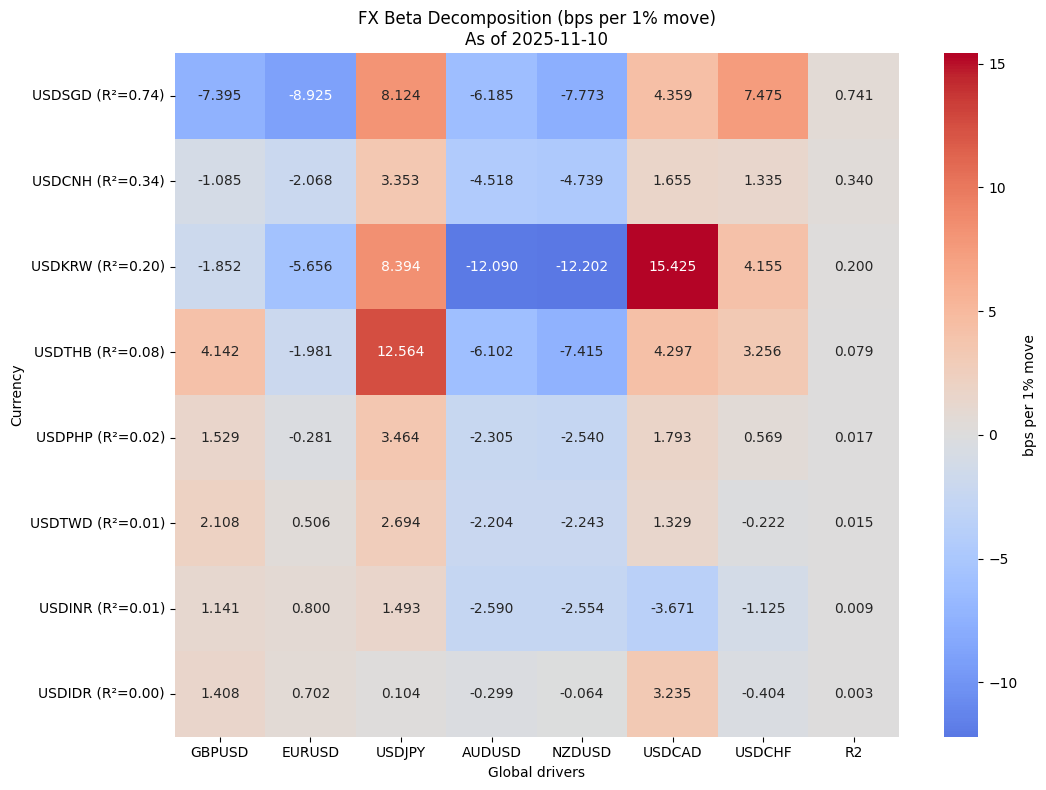

In [62]:
# rename columns
col_map = {
    'EURUSD': 'EURUSD',
    'GBPUSD': 'GBPUSD',
    'USDJPY': 'USDJPY',
    'AUDUSD': 'AUDUSD',
    'NZDUSD': 'NZDUSD',
    'USDCAD': 'USDCAD',
    'USDCHF': 'USDCHF',
}
df = fx_to_orig_bps_per_1pct.rename(columns=col_map)

# rename currency labels
row_map = {
    'USDSGD Curncy': 'USDSGD',
    'PPN+1M Curncy': 'USDPHP',
    'KWN+1M Curncy': 'USDKRW',
    'IRN+1M Curncy': 'USDINR',
    'IHN+1M Curncy': 'USDIDR',
    'USDTHB Curncy': 'USDTHB',
    'USDCNH Curncy': 'USDCNH',
    'MRN+1M Curncy': 'USDMYR'
}
df = df.rename(index=row_map)

y_labels = [
    f"{ccy} (R²={r2:.2f})"
    for ccy, r2 in zip(df.index, df['R2'])
]

# heatmap
heatmap_df = df.iloc[:, :8]
plt.figure(figsize=(11, 8))

ax = sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    center=0,
    cbar_kws={'label': 'bps per 1% move'}
)

ax.set_yticklabels(y_labels, rotation=0)  # ✅ replace row names with R² included
ax.set_xlabel("Global drivers")
ax.set_ylabel("Currency")

title_date = df['Date'].iloc[0]
ax.set_title(f"FX Beta Decomposition (bps per 1% move)\nAs of {title_date:%Y-%m-%d}")

plt.tight_layout()
plt.show()